--Notebook for developing methods for visualization of logbook data
--Heatmap of hold usage for each set


In [1]:
import json
import matplotlib.pyplot as plt
import os

In [2]:
def collect_hold_data():
    os.chdir("logbooks")
    for board_setup in os.listdir(): # loop through board setups
        os.chdir(board_setup)
        hold_matrix = [[0 for i in range(11)] for j in range(18)] # init hold use matrix
        sessions_folder = [file for file in os.listdir() if not file.endswith('.json')][0] # get sessions folder, ignoring summary json file
        os.chdir(sessions_folder)
        for session in os.listdir(): # loop through sessions
            with open(session, 'r') as file:
                data = json.load(file)  # load the JSON content
                for boulder in data["Data"]:
                    for hold in boulder["Problem"]["Locations"]:
                        x, y = hold["X"], hold["Y"]
                        x = round((x-95)/50) # convert x and y to matrix indices
                        y = round((y-88)/50)
                        hold_matrix[y][x] += 1
        os.chdir("..") # return to parent directory
        with open('hold_matrix.json', 'w') as json_file: # save hold matrix
            json.dump(hold_matrix, json_file, indent=4)
        generate_heatmap(hold_matrix)
        os.chdir("..") 
    os.chdir("..")

           

In [3]:
def generate_heatmap(hold_matrix):
    fig, axes = plt.subplots()
    heatmap = axes.imshow(hold_matrix, cmap='magma', interpolation='nearest')
    axes.set_title("Hold use Heatmap")
    plt.colorbar(heatmap, ax=axes)  # Add a colorbar to the heatmap
    plt.tight_layout()
    plt.axis("off")
    plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')

    

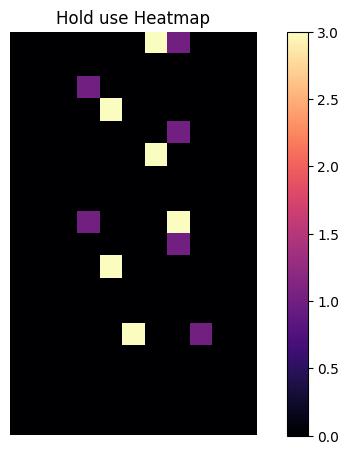

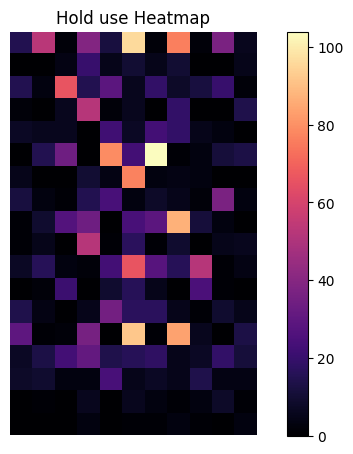

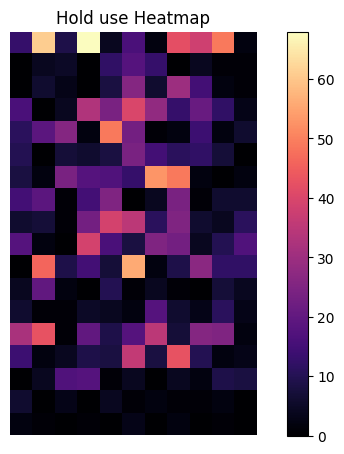

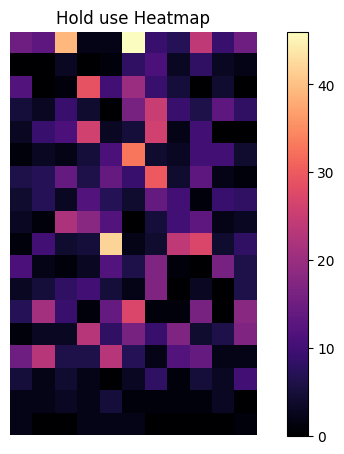

In [4]:
collect_hold_data()